In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_rows', None)

In [ ]:
df=pd.read_csv('train.csv')
ts=pd.read_csv('test.csv')

In [ ]:
df.isnull().values.any()

False

In [ ]:
def plot_hist(variable):
    plt.figure(figsize = (18,3))
    plt.hist(df[variable], bins = 200)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

In [ ]:
extra.head()
extra.describe()

,student_id,sem2_Entrepôts dedonnées examain,sem2_Entrepôts dedonnées M,sem2_Entrepôts dedonnées C,sem2_Administration des bases de données examain,sem2_Administration des bases de données M,sem2_Administration des bases de données C,sem2_M_module_Bases de données,sem2_C_module_Bases de données,sem2_Techniquesd'indexation examain,...,sem2_Vision par ordinateur examain,sem2_Vision par ordinateur M,sem2_Vision par ordinateur C,sem2_ERP et Intégration des Systèmes examain,sem2_ERP et Intégration des Systèmes M,sem2_ERP et Intégration des Systèmes C,sem2_M_module_Unitè Optionnelle,sem2_C_module_Unitè Optionnelle,final_Moyenne du semestre 2,final_Crédit semestre 2
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,...,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,88.500000,9.860955,9.927978,1.157303,11.711798,12.171236,1.505618,11.036124,2.977528,10.380337,...,11.352528,11.763989,2.387640,9.969101,10.636910,1.932584,11.269775,4.702247,11.614944,24.224719
std,51.528309,5.854218,5.360039,0.990336,6.224283,5.387782,0.865191,5.014767,1.636294,5.157610,...,4.583233,4.241805,1.221865,5.404777,4.992136,1.448145,4.179976,2.296176,3.728970,9.276363
min,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.240000,0.000000
25%,44.250000,6.062500,7.112500,0.000000,8.562500,10.030000,2.000000,9.090000,2.000000,8.812500,...,10.500000,10.977500,3.000000,7.000000,8.327500,0.000000,9.865000,3.000000,10.557500,21.250000
50%,88.500000,10.875000,10.740000,2.000000,13.375000,13.585000,2.000000,12.060000,4.000000,11.500000,...,12.500000,12.835000,3.000000,10.250000,11.410000,3.000000,12.440000,6.000000,12.865000,30.000000
75%,132.750000,14.500000,14.152500,2.000000,16.500000,16.142500,2.000000,14.477500,4.000000,14.000000,...,14.000000,14.445000,3.000000,13.500000,13.937500,3.000000,13.992500,6.000000,13.907500,30.000000
max,177.000000,20.000000,19.700000,2.000000,20.000000,20.000000,2.000000,19.450000,4.000000,19.500000,...,18.500000,17.850000,3.000000,20.000000,19.320000,3.000000,18.080000,6.000000,17.100000,30.000000


In [ ]:
list_des_col_moyene = []
for i in df.columns:
    if i[-1]=="M":
        print(i)
        list_des_col_moyene.append(i)

sem1_Probabilité et statistique M
sem1_Théorie des langages des Automates M
sem1_Graphes et optimisation M
sem1_Ingénierie des bases de données M
sem1_Services des réseaux M
sem1_Gestiond'entreprise M
sem1_Anglais 3 M
sem1_Conception des systémes d'information M
sem1_Programmation Java M
sem1_(Système d'Information à Référence Spatiale (SIRS) M
sem1_Outils de Travail Collaboratif M


In [ ]:
df.loc[:,list_des_col_moyene].mean().sort_values()

sem1_Outils de Travail Collaboratif M                         8.208483
sem1_Théorie des langages des Automates M                     8.747921
sem1_Probabilité et statistique M                             9.168596
sem1_(Système d'Information à Référence Spatiale (SIRS) M     9.843989
sem1_Conception des systémes d'information M                 10.057191
sem1_Programmation Java M                                    10.295000
sem1_Services des réseaux M                                  10.393146
sem1_Gestiond'entreprise M                                   10.512584
sem1_Ingénierie des bases de données M                       10.927416
sem1_Anglais 3 M                                             11.281461
sem1_Graphes et optimisation M                               11.376292
dtype: float64

In [ ]:
list_des_col_tp = []
for i in df.columns:
    if i[-2:]=="tp":
        print(i)
        list_des_col_tp.append(i)

sem2_Administration des bases de données tp
sem2_Techniquesd'indexation tp
sem2_Technologies et programmation web tp
sem2_Tests de logiciels (certification ISTQB) tp
sem2_Techniques de compilation tp
sem2_Fondements de l'intelligence artificielle (programmation IA) tp
sem2_Vision par ordinateur tp
sem2_ERP et Intégration des Systèmes tp
sem1_Probabilité et statistique tp
sem1_Ingénierie des bases de données tp
sem1_Services des réseaux tp
sem1_Programmation Java tp
sem1_(Système d'Information à Référence Spatiale (SIRS) tp
sem1_Outils de Travail Collaboratif tp


In [ ]:
df.drop(list_des_col_tp, inplace = True , axis = 1)
df

,student_id,sem2_Entrepôts dedonnées ds,sem2_Administration des bases de données ds,sem2_Techniquesd'indexation ds,sem2_Technologies et programmation web ds,sem2_Tests de logiciels (certification ISTQB) ds,sem2_Techniques de compilation ds,sem2_Fondements de l'intelligence artificielle (programmation IA) ds,"sem2_Droit d'informatique,protection des données et éthique ds",sem2_Projet fedéré (methode Agile) ds,...,sem1_(Système d'Information à Référence Spatiale (SIRS) examain,sem1_(Système d'Information à Référence Spatiale (SIRS) M,sem1_(Système d'Information à Référence Spatiale (SIRS) C,sem1_Outils de Travail Collaboratif ds,sem1_Outils de Travail Collaboratif examain,sem1_Outils de Travail Collaboratif M,sem1_Outils de Travail Collaboratif C,final_Moyenne semestre 1,final_Crédit semestre 1,final_Moyenne générale
0,0,7.00,15.50,9.25,13.50,12.38,11.25,16.00,13.0,16.00,...,7.50,9.30,0.0,3.38,5.25,4.69,0.0,7.73,5.0,9.88
1,1,12.00,19.75,13.00,12.75,12.38,11.38,15.75,14.0,16.00,...,11.50,11.80,3.0,9.38,7.25,7.89,0.0,10.98,23.0,12.95
2,2,14.00,19.00,12.75,16.00,14.38,16.38,12.75,16.0,18.00,...,13.50,13.50,3.0,10.13,12.50,11.79,3.0,12.16,30.0,12.38
3,3,17.50,20.00,18.00,17.25,16.75,18.38,16.88,16.0,18.00,...,14.00,14.45,3.0,15.63,18.75,17.81,3.0,15.59,30.0,16.34
4,4,11.00,13.00,7.80,12.00,13.00,12.00,16.00,0.0,18.00,...,8.75,10.18,3.0,7.00,11.25,9.98,0.0,7.59,19.0,9.50
5,5,17.25,3.00,5.50,9.00,11.00,7.13,11.00,13.0,16.00,...,9.50,6.65,0.0,3.50,6.75,5.77,0.0,4.92,0.0,6.34
6,6,15.00,14.25,11.50,14.75,14.38,12.88,13.13,16.0,17.50,...,7.00,8.95,0.0,5.50,12.25,10.22,3.0,12.74,23.0,12.81
7,7,5.50,14.00,15.00,15.00,13.00,13.00,15.00,14.0,18.00,...,8.25,10.58,3.0,14.63,5.75,8.41,0.0,13.47,27.0,13.32
8,8,3.00,10.25,9.75,13.75,12.00,9.63,11.50,14.0,16.00,...,3.50,6.20,0.0,3.25,4.25,3.95,0.0,9.32,19.0,8.36
9,9,10.00,17.00,12.00,16.00,10.00,12.00,15.00,14.0,16.00,...,7.00,8.65,0.0,14.50,13.25,13.62,3.0,10.55,22.0,11.50


In [ ]:
ts.drop(list_des_col_tp, inplace = True , axis = 1)


In [ ]:
df = df.replace(-1, np.nan).fillna(df.mean()[0])
ts = ts.replace(-1, np.nan).fillna(df.mean()[0])

In [ ]:
df.drop(['student_id'],axis=1,inplace=True)

In [ ]:
ts.drop(['student_id'],axis=1,inplace=True)

In [ ]:
corr1 = extra.corr()

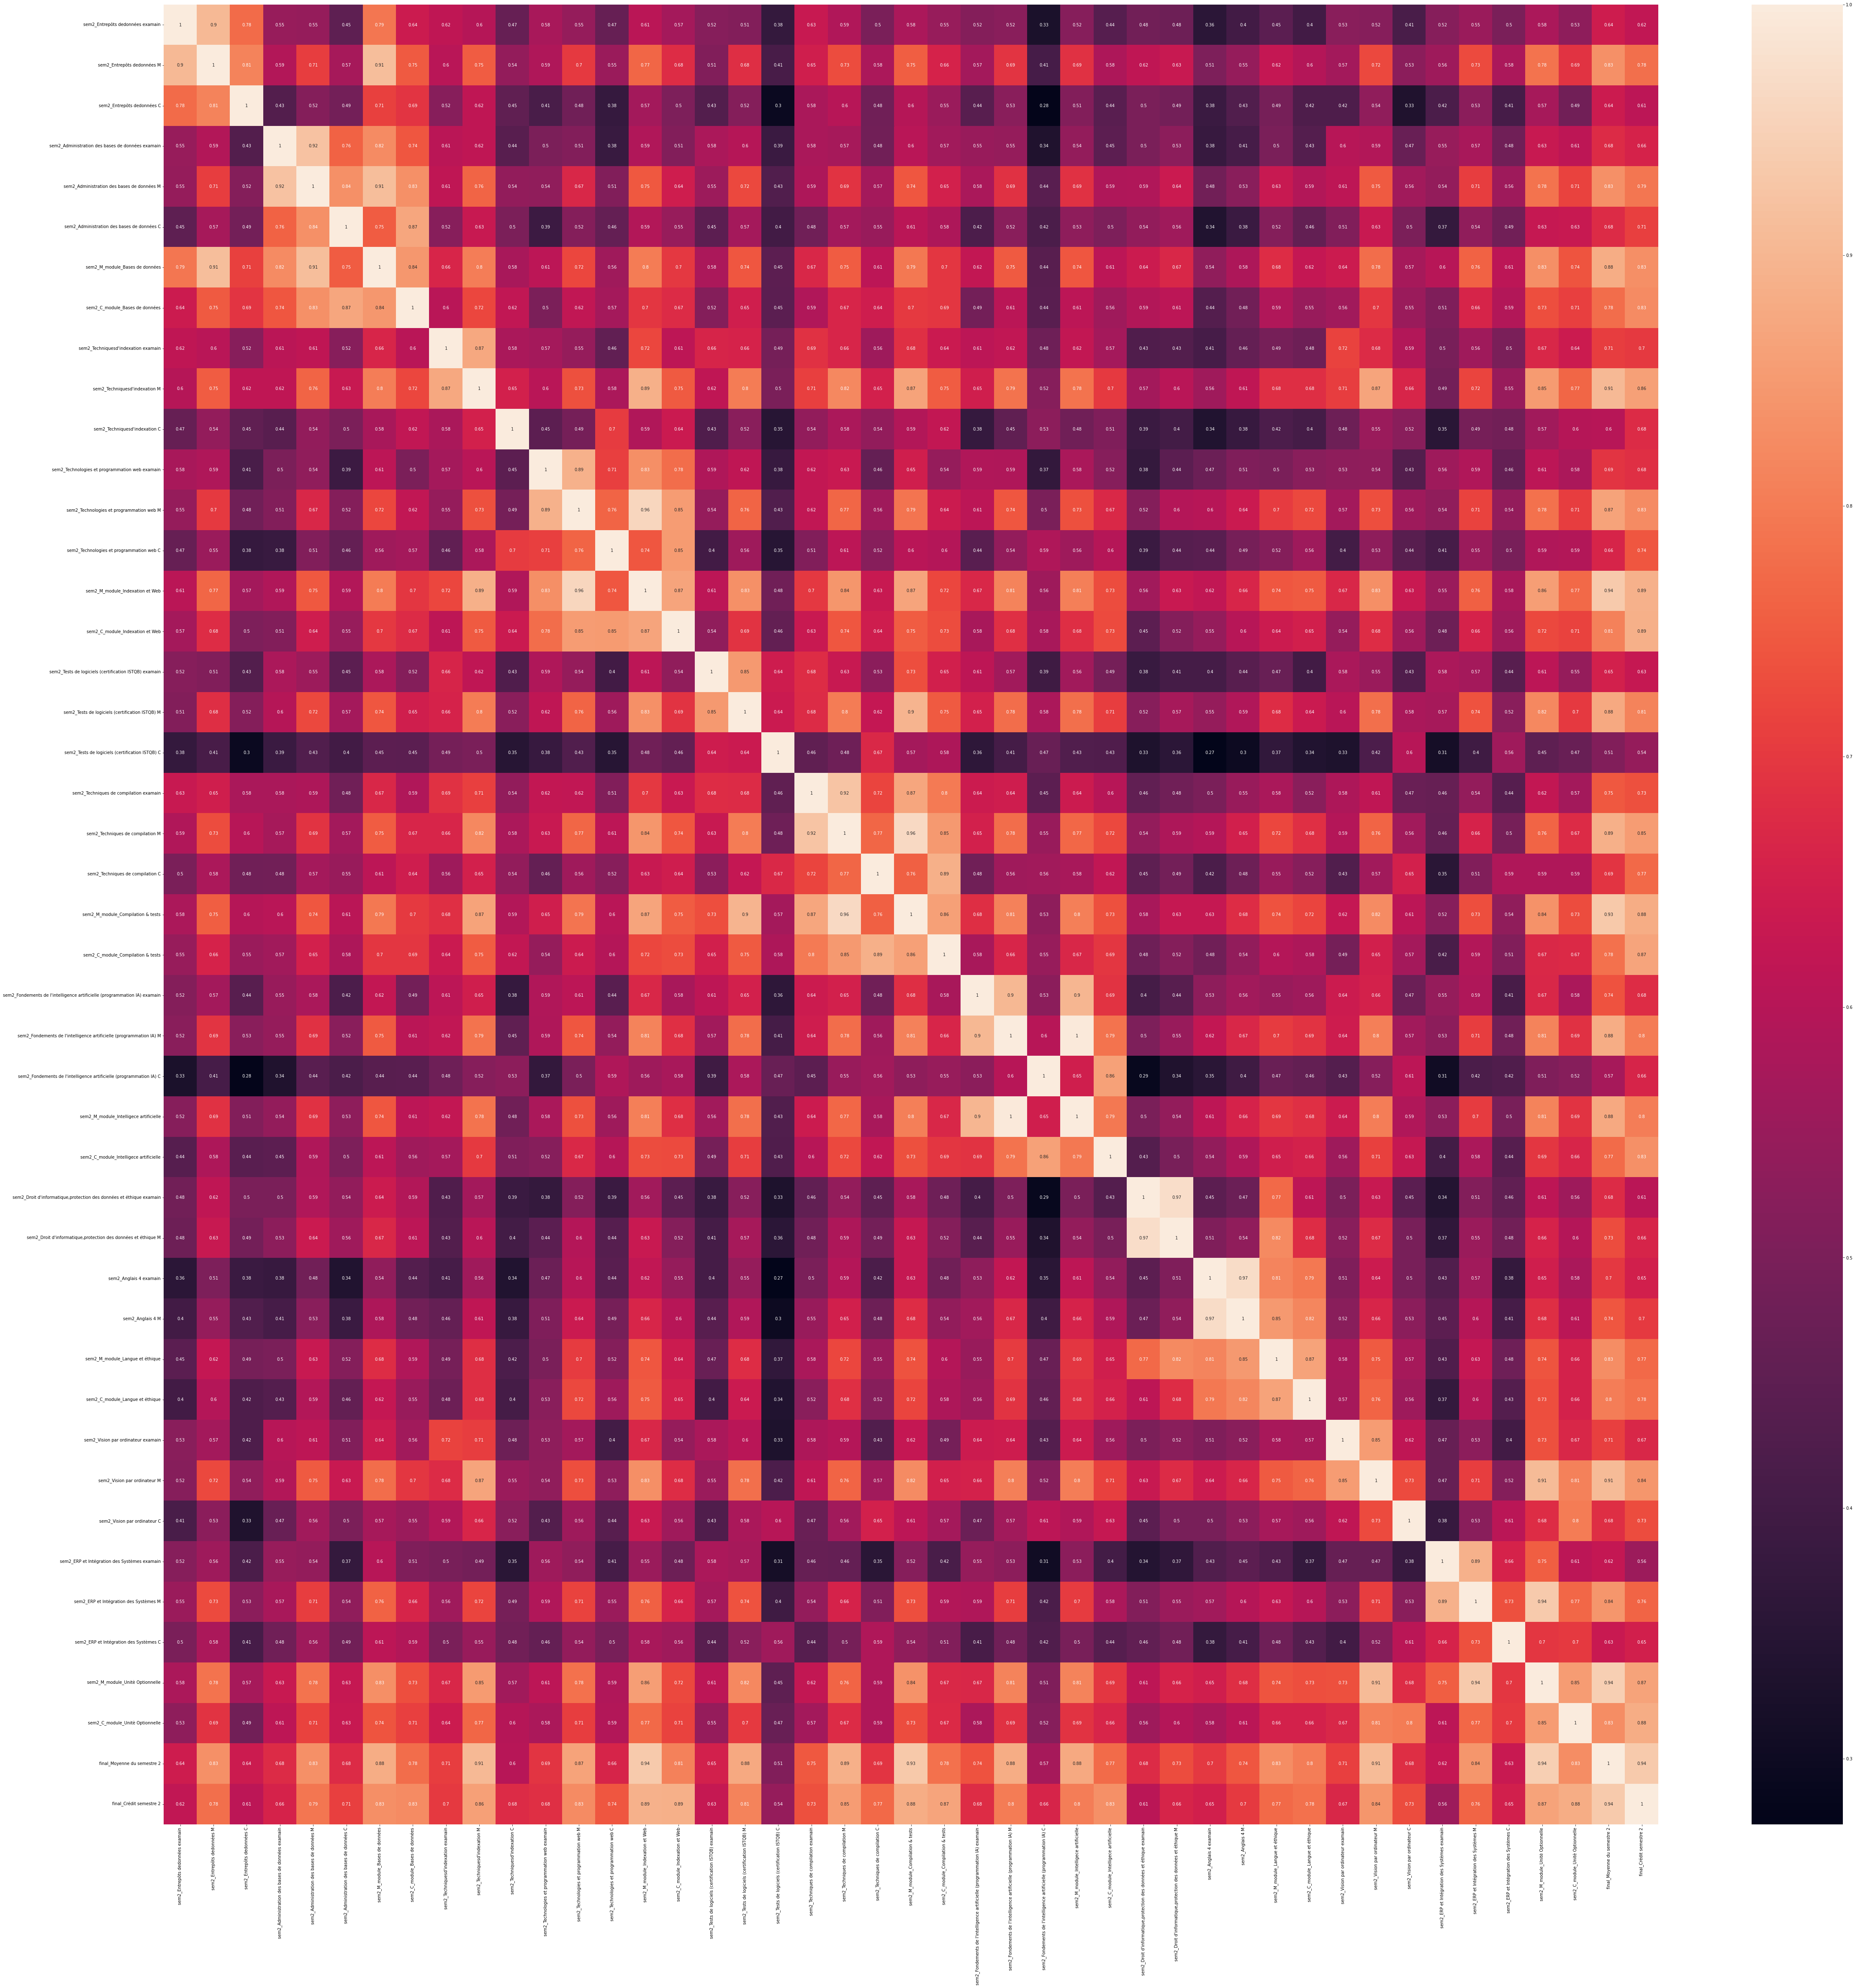

In [ ]:
plt.figure(figsize = (80,80))
sns.heatmap(extra.corr(), annot=True)
plt.show()

In [ ]:
extra=extra.drop("sem2_Anglais 4 C",axis=1)

In [ ]:
extra=extra.drop("sem2_Projet fedéré (methode Agile) C",axis=1)
extra=extra.drop("sem2_Droit d'informatique,protection des données et éthique C",axis=1)



In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.0 MB/s eta 0:00:00


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

X = df.drop('final_Moyenne générale', axis=1)
y = df['final_Moyenne générale']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd


param_grid = {
    'n_estimators': [200,300,400],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4]
}

rfr = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %.2f" % mse)
print("Best Hyperparameters: ", grid_search.best_params_)





Mean Squared Error: 0.55
Best Hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


In [ ]:
print(y_pred)

[ 9.2316 12.4784 10.9704 15.1704 12.5916 10.6632 14.6372 13.5412  7.6
  9.1764 10.9008 12.4232 14.8844 13.3744 13.0672  8.1204 15.1124 11.0076
 12.5044 13.6076 13.584   6.232  11.1468  4.1696  7.1552  9.4528 11.2872
 15.074   8.4556 12.3688 15.1872  5.3596 12.9368 14.6944  7.1356 12.8892]


In [ ]:
prediction= grid_search.predict(ts)

In [ ]:
print(prediction)

[11.50854795 11.65928172 11.48590637 15.31815416  4.66737053  9.09423596
 15.1632436  12.42192903 12.53089766  7.60664847 14.55241061 10.98447016
  8.03558408 13.15080086 12.87918751 15.19354802 11.83362734 13.45218605
  3.79062174 11.22239516 12.79942545 15.10695697  9.34102954  7.95011822
 11.34596918 14.06578967 12.78918635  8.9375876   9.96227959  6.4074586
  6.51283031  6.36717222 13.20546511  9.73670198 11.44661057  9.39779797
  7.25703174 12.28329106 12.79456706 11.36420037  9.7297004   8.81139779
 15.42461613 12.55256347 13.12164736 13.42084913 13.60843391  5.4400549
  8.02055199 15.40605618 11.25529739 14.60898291  9.37080182 11.8688587
  6.85480552 11.98199326 12.67098958  9.32021411  6.43798549 12.66287271
 13.61903068 14.5410245  14.55265064 12.81073064 13.3683318  12.64463055
 11.90447977  9.09888948 10.81243917 10.22648934 13.64818044 12.637255
  5.30240125 13.06852427  7.10984331 15.39517723 13.58281216  6.17448489
  7.3502884  13.17196536 14.52351608 10.18191607 15.4840

In [ ]:
sub = pd.read_csv("Sample Submission.csv")

In [ ]:
sub["final_Moyenne générale"] = prediction

In [ ]:
sub.head()

,student_id,final_Moyenne générale
0,0,11.365355
1,1,11.569921
2,2,11.349716
3,3,15.067067
4,4,6.162075


In [ ]:
sub.to_csv("submission23.csv" , index = False)